# Proyek Analisis Data: E-Commerce Public
- **Nama:** Muhammad Fachrel Ardaffa Putra
- **Email:** B244030E@devacademy.id
- **ID Dicoding:** muhfachrelardaffa

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Menentukan Pertanyaan Bisnis

- Produk dengan product_id apa yang paling banyak terjual?
- wilayah (state) mana yang memiliki jumlah pembelian terbanyak?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling

### Gathering Data

In [6]:
customers_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/geolocation_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/order_items_dataset.csv')
order_payments_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/order_reviews_dataset.csv')
orders_dataset_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/orders_dataset.csv')
product_category_name_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/product_category_name_translation.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Dicoding/Proyek Analisis Data/sellers_dataset.csv')

**Customers**

In [7]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Geolocation**

In [8]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Order Items**

In [9]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Order Payments**

In [10]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Order Reviews**

In [11]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Orders**

In [12]:
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Product Category**

In [13]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Products**

In [14]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Sellers**

In [15]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Semua data frame berupa file csv
- Ada beberapa variable yang bisa dijadikan key untuk dilakukan merge. misalnya seperti order id dan customer id. nantinya variable ini akan digunakan untuk acuan dilakukannya merge data frame (Primary key).

### Assessing Data

Dari beberapa dataframe yang telah diimport di notebook ini, saya tidak membutuhkan semua data frame untuk menjawab pertanyaan bisnis yang telah saya tentukan sebelumnya. saya hanya membutuhkan order_items_df, products_df, geolocation_df, orders_dataset_df, customers_df, sisanya tidak saya butuhkan. maka dari itu, selanjutnya saya hanya menggunakan 5 data frame tersebut.

#### Customers

In [16]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [17]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [18]:
customers_df.duplicated().sum()

0

In [19]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Geolocation

In [20]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [21]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [22]:
geolocation_df.duplicated().sum()

261831

In [23]:
geolocation_df[geolocation_df.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


In [24]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Order Items

In [25]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [27]:
order_items_df.duplicated().sum()

0

In [28]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Orders

In [29]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [31]:
orders_dataset_df.duplicated().sum()

0

In [32]:
orders_dataset_df[orders_dataset_df.isna().any(axis=1)].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [33]:
orders_dataset_df.order_status.value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


#### Products

In [34]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [36]:
products_df.duplicated().sum()

0

In [37]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Insight

**Insight:**
- Terdapat beberapa duplicate value pada data frame geolocation
- Terdapat beberapa missing value pada data frame dan orders
- Semua column yang berisikan tanggal pada dataframe yang saya gunakan masih bertipe data object, harus dirubah ke datetime. ada juga beberapa yang harus dirubah ke numerical, bukan lagi object.
- Beberapa nama coulmn masih membingungkan dan sulit dimengerti, nama column tersebut harus dirubah agar mudah dimengerti


### Cleaning Data


#### Order Items



- Mengganti tipe data shipping_limit_date ke date time

- Mengganti nama kolom freight_value ke shipping cost

**Before**

In [38]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [40]:
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_items_df.rename(columns={'freight_value': 'shipping_cost'}, inplace=True)

**After**

In [41]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   shipping_cost        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Products



- Melakukan drop pada data duplicate
- Ubah tipe data product_name_lenght, product_description_lenght, product_photos_qty menjadi int, karena column ini hanya berisi bilangan bulat saja.
- Perbaiki typo penulisan length

 **Before**

In [42]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [44]:
products_df.rename(columns={'product_name_lenght': 'product_name_length','product_description_lenght': 'product_description_length'}, inplace=True)

In [45]:
products_df['product_name_length'] = products_df['product_name_length'].astype('int', errors='ignore')
products_df['product_description_length'] = products_df['product_description_length'].astype('int', errors='ignore')
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype('int', errors='ignore')

In [46]:
products_df.dropna(inplace=True)

**After**

In [47]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [48]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_length         32340 non-null  float64
 3   product_description_length  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**tipe data sudah berubah menjadi integer**

In [49]:
products_df.head(3)

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


#### Geolocation


- Mengganti semua nama kolom

**Before**

In [50]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [51]:
geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code','geolocation_lat': 'latitude','geolocation_lng': 'longitude','geolocation_city': 'city','geolocation_state': 'state'}, inplace=True)

**After**

In [52]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   zip_code   1000163 non-null  int64  
 1   latitude   1000163 non-null  float64
 2   longitude  1000163 non-null  float64
 3   city       1000163 non-null  object 
 4   state      1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Orders


- Mengubah tipe data kolom yang berisikan tanggal/waktu menjadi datetime.
- Merubah nama kolom agar mudah dimengerti
- Melakukkan dropping missing value

**Before**

In [53]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [54]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [55]:
datetime_columns = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for col in datetime_columns:
  orders_dataset_df[col] = pd.to_datetime(orders_dataset_df[col])

In [56]:
orders_dataset_df.rename(columns={'order_status': 'status','order_purchase_timestamp': 'purchase_time','order_approved_at': 'approved_time','order_delivered_carrier_date': 'carrier_delivery_date','order_delivered_customer_date': 'customer_delivery_date','order_estimated_delivery_date': 'estimated_delivery_date'}, inplace=True)

In [57]:
orders_dataset_df.dropna(inplace=True)

**After**

In [58]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 96461 non-null  object        
 1   customer_id              96461 non-null  object        
 2   status                   96461 non-null  object        
 3   purchase_time            96461 non-null  datetime64[ns]
 4   approved_time            96461 non-null  datetime64[ns]
 5   carrier_delivery_date    96461 non-null  datetime64[ns]
 6   customer_delivery_date   96461 non-null  datetime64[ns]
 7   estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [59]:
orders_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
status,0
purchase_time,0
approved_time,0
carrier_delivery_date,0
customer_delivery_date,0
estimated_delivery_date,0


#### Customers



- Mengganti nama kolom agar lebih mudah dipahami

In [60]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [61]:
customers_df.rename(columns={'customer_zip_code_prefix': 'zip_code','customer_city': 'city','customer_state': 'state'}, inplace=True)

#### Insight

**Insight:**

- Kolom yang berisikan tanggal/waktu seperti shipping_limit_date di order_items_df dan purchase_time, approved_time di orders_dataset_df diubah ke tipe datetime.
- Nama kolom seperti freight_value dirubah menjadi shipping_cost di order_items_df, order_status dirubah menjadi status di orders_dataset_df, dan kolom lainnya diubah untuk mempermudah pemahaman.
- Kolom numerik seperti product_name_length, product_description_length, dan product_photos_qty di products_df diubah menjadi integer karena hanya berisi bilangan bulat saja.
- Perbaikan typo lenght menjadi length dan merubah nama kolom di geolocation_df dan customers_df. ini dilakukan untuk mempermudah pemahaman data dan penggabungan antar data frame.

## Exploratory Data Analysis (EDA)

### 1

In [62]:
# Cek struktur dataset order_items
print(order_items_df.info())
print(order_items_df.describe())

# Cek struktur dataset products
print(products_df.info())
print(products_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   shipping_cost        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None
       order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25

Dari dataframe `products_df` dan `order_items_df` saya merasa hanya beberapa kolum saja yang memang relevan untuk menjawab pertanyaan bisnis yang sebelumnya sudah saya tetapkan. Kolom tersebut ialah:
- Dari  `order_items_df`: `order_item_id`, `product_id`, `price`.
- Dari `products_df`: `product_id`, `product_category_name`.

Lalu, jika melihat dari keseluruhan dataset, saya hanya menganggap produk sudah terjual ketika status pengiriman barang sudah `Delivered`. Yang artinya barang memang sudah sampai ke tangan pembeli.
Maka dari itu, langkah selanjutnya ialah mencari order yang memiliki status `Delivered`. untuk mencarinya menggunakan kolom `status` yang ada di `order_dataset_df`.

In [63]:
# Cek Struktur dataset orders
print(orders_dataset_df.info())
print(orders_dataset_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 96461 non-null  object        
 1   customer_id              96461 non-null  object        
 2   status                   96461 non-null  object        
 3   purchase_time            96461 non-null  datetime64[ns]
 4   approved_time            96461 non-null  datetime64[ns]
 5   carrier_delivery_date    96461 non-null  datetime64[ns]
 6   customer_delivery_date   96461 non-null  datetime64[ns]
 7   estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None
                       purchase_time                  approved_time  \
count                          96461                          96461   
mean   2018-01-01 23:53:26.642249216  2018-01-02 10:10:06.480142336   
min       

In [64]:
# Menghitung jumlah data berdasarkan status
status_counts = orders_dataset_df.groupby('status').size().reset_index(name='count')
status_counts

,status,count
0,canceled,6
1,delivered,96455


Dari hasil pencarian, terlihat bahwa ada 6 order yang berstatus `Canceled` maka dari itu saya akan melakukan filtering dan hanya mengambil yang berstatus `Delivered` saja.

In [65]:
# Memfilter dataset hanya untuk status "delivered"
delivered_orders = orders_dataset_df.loc[orders_dataset_df['status'] == 'delivered']

Lalu selanjutnya akan dilakukan `inner join`/`merge` pada `delivered_orders` dengan `order_items_df` berdasarkan `order_id`.

In [66]:
# Menggabungkan kedua DataFrame berdasarkan kolom "order_id"
merged_df = delivered_orders.merge(order_items_df, on='order_id', how='inner')

# Cek hasilnya
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 110173 non-null  object        
 1   customer_id              110173 non-null  object        
 2   status                   110173 non-null  object        
 3   purchase_time            110173 non-null  datetime64[ns]
 4   approved_time            110173 non-null  datetime64[ns]
 5   carrier_delivery_date    110173 non-null  datetime64[ns]
 6   customer_delivery_date   110173 non-null  datetime64[ns]
 7   estimated_delivery_date  110173 non-null  datetime64[ns]
 8   order_item_id            110173 non-null  int64         
 9   product_id               110173 non-null  object        
 10  seller_id                110173 non-null  object        
 11  shipping_limit_date      110173 non-null  datetime64[ns]
 12  price           

Setelah dilakukan pengecekan, dapat terlihat bahwa `merged_df` memiliki 110173 values.

In [67]:
merged_df.head()

,order_id,customer_id,status,purchase_time,approved_time,carrier_delivery_date,customer_delivery_date,estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,shipping_cost
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


Lalu lakukan lagi pemeriksaan, apakah memang `order_id` dapat muncul lebih dari sekali

In [68]:
# Mengecek jumlah kemunculan setiap order_id
order_id_counts = merged_df['order_id'].value_counts()

# Filter untuk order_id yang muncul lebih dari sekali
duplicate_order_ids = order_id_counts[order_id_counts > 1]

# Menampilkan hasil
duplicate_order_ids

,count
order_id,
8272b63d03f5f79c56e9e4120aec44ef,21
1b15974a0141d54e36626dca3fdc731a,20
ab14fdcfbe524636d65ee38360e22ce8,20
428a2f660dc84138d969ccd69a0ab6d5,15
9ef13efd6949e4573a18964dd1bbe7f5,15
...,...
e8bd6a70539a3b4888a2b8dd053b470d,2
cddea1bd1a4801af96fb84aab51b00fa,2
12c03d5b5ba9badd6cc9bf90f981ca92,2


Dapat disimpulkan `order_id` dapat muncul lebih dari sekali. yang artinya satu pesanan (order) tersebut terdiri dari beberapa item produk.

Lalu selanjutnya, dilakukan `merging` lagi untuk mendapatkan informasi kategori dari setiap produk. `merging` dilakukan pada `merged_df` dan `products_df`.

In [69]:
# Merge dataset
merged_dataset = merged_df.merge(products_df[['product_id', 'product_category_name']],on='product_id',how='left')

Lalu jangan lupa dilakukan pengecekan kembali. apakah jumlah value berbeda `before` dan `after` merging.

In [70]:
# Periksa jumlah baris sebelum dan setelah penggabungan
print("Jumlah baris sebelum penggabungan:", len(merged_df))
print("Jumlah baris setelah penggabungan:", len(merged_dataset))

Jumlah baris sebelum penggabungan: 110173
Jumlah baris setelah penggabungan: 110173


Hasilnya ialah berjumlah sama.

Lalu selanjutnya dilakukan perhitungan jumlah penjualan terbanyak dari produk yang ada.

In [71]:
# Hitung jumlah penjualan per produk
product_sales = merged_dataset.groupby(['product_id', 'product_category_name']).size().reset_index(name='sales')

# Urutkan berdasarkan jumlah penjualan
top_5_products = product_sales.sort_values(by='sales', ascending=False).head(5)

# Tampilkan hasil
print("Top 5 Produk Paling Banyak Terjual:")
top_5_products

Top 5 Produk Paling Banyak Terjual:


,product_id,product_category_name,sales
21240,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,520
8277,422879e10f46682990de24d770e7f83d,ferramentas_jardim,484
18950,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,477
7076,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,390
6800,368c6c730842d78016ad823897a372db,ferramentas_jardim,388


Dapat terlihat, 5 produk dengan penjualan terbanyak. namun pada kategori produk, masih bukan berbahasa inggris, maka dari itu harus diganti ke bahasa inggris menggunakan informasi pada `products_dataset`.

In [72]:
# Merge top_5_products dengan product_category_name_df untuk mendapatkan kategori dalam bahasa Inggris
top_5_products = top_5_products.merge(product_category_name_df[['product_category_name', 'product_category_name_english']],on='product_category_name',how='left')

# Hapus kolom product_category_name karena hanya pakai yang inggris
top_5_products = top_5_products.drop(columns=['product_category_name'])

top_5_products

,product_id,sales,product_category_name_english
0,aca2eb7d00ea1a7b8ebd4e68314663af,520,furniture_decor
1,422879e10f46682990de24d770e7f83d,484,garden_tools
2,99a4788cb24856965c36a24e339b6058,477,bed_bath_table
3,389d119b48cf3043d311335e499d9c6b,390,garden_tools
4,368c6c730842d78016ad823897a372db,388,garden_tools


In [73]:
top_5_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     5 non-null      object
 1   sales                          5 non-null      int64 
 2   product_category_name_english  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


**Insight:**
- Product yang paling banyak terjual ialah product dengan `product id ``aca2eb7d00ea1a7b8ebd4e68314663af`, yang berkategori `furniture_decore`, yang terjual sebanyak `520`.

### 2

Karena sebelumnya sudah dilakukan `filtering data` yang berstatus `delivered`. pada nomer 2 ini, kita hanya memakai data yang sudah kita filtering tersebut. data tersebut disimpan di dalam variable `delivered_orders`.

Lalu selanjutnya, dilakukan merging `delivered_orders` dengan `customers_df`. merging ini dilakukan berdasarkan `customer_id`, dan dilakukan untuk mendapatkan informasi state pada setiap `customer_id`.

In [74]:
merged_data = pd.merge(delivered_orders, customers_df, on='customer_id', how='left')

In [75]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96455 entries, 0 to 96454
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 96455 non-null  object        
 1   customer_id              96455 non-null  object        
 2   status                   96455 non-null  object        
 3   purchase_time            96455 non-null  datetime64[ns]
 4   approved_time            96455 non-null  datetime64[ns]
 5   carrier_delivery_date    96455 non-null  datetime64[ns]
 6   customer_delivery_date   96455 non-null  datetime64[ns]
 7   estimated_delivery_date  96455 non-null  datetime64[ns]
 8   customer_unique_id       96455 non-null  object        
 9   zip_code                 96455 non-null  int64         
 10  city                     96455 non-null  object        
 11  state                    96455 non-null  object        
dtypes: datetime64[ns](5), int64(1), 

Dapat terlihat data sudah tergabung.

Selanjutnya dilakukan perhitungan untuk mencari state dengan jumlah produk terjual terbanyak.

In [76]:
# Hitung jumlah pesanan per state
sales_per_state = merged_data.groupby('state').size().reset_index(name='total_products_sold')

# Urutkan berdasarkan jumlah produk terjual terbanyak
top_10_states = sales_per_state.sort_values(by='total_products_sold', ascending=False).head(10)

In [77]:
top_10_states

,state,total_products_sold
25,SP,40488
18,RJ,12348
10,MG,11351
22,RS,5342
17,PR,4923
23,SC,3546
4,BA,3256
6,DF,2080
7,ES,1995
8,GO,1957


**Insight:**
- `SP` merupakan `state` dengan produk terjual terbanyak, yaitu sebanyak `40488 produk`.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

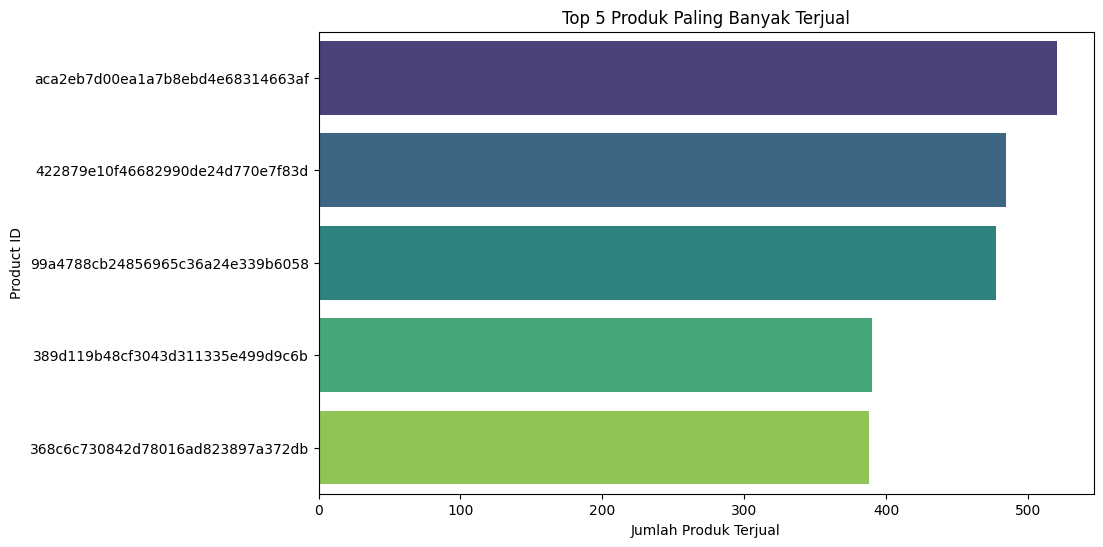

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='product_id', data=top_5_products, palette='viridis')
plt.title('Top 5 Produk Paling Banyak Terjual')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Product ID')
plt.show()

### Pertanyaan 2:

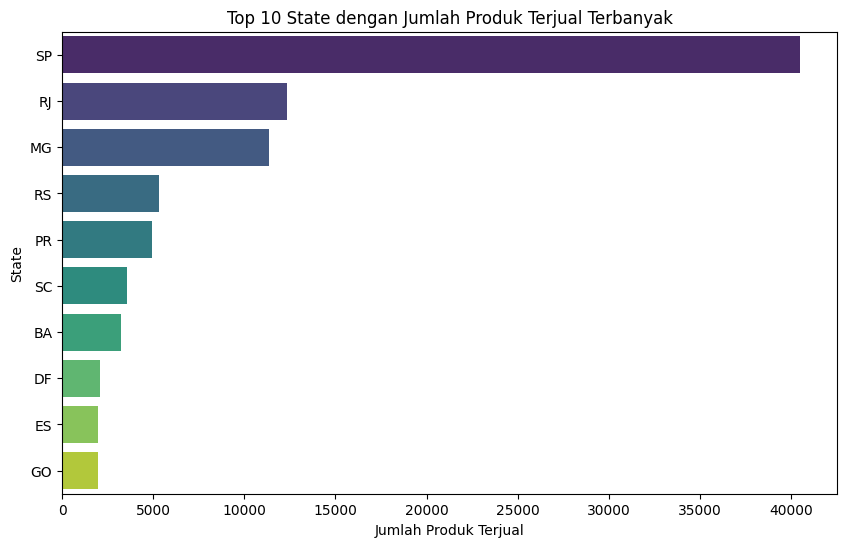

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='total_products_sold', y='state', data=top_10_states, palette='viridis')
plt.title('Top 10 State dengan Jumlah Produk Terjual Terbanyak')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('State')
plt.show()

**Insight:**
- Produk yang paling banyak terjual ialah produk dengan `penjualan > 500`
- `State` dengan jumlah produk terjual ialah `SP`

## Conclusion

1. Produk terlaris yaitu produk dengan product_id `aca2eb7d00ea1a7b8ebd4e68314663af`, produk tersebut memiliki Penjualan Lebih dari 500 Unit. Produk dengan penjualan lebih dari 500 unit menunjukkan permintaan yang tinggi di pasar. Hal ini menandakan bahwa produk-produk tertentu memiliki daya tarik yang kuat bagi pelanggan, mungkin karena kualitas, harga yang kompetitif, atau relevan dengan tren market saat ini.

2. `SP` merupakan state dengan jumlah produk terjual terbanyak, mencapai 40.488 produk. Ini menunjukkan bahwa state ini memiliki tingkat pembelian yang lebih tinggi dibandingkan dengan wilayah lain.